<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.384510,45.960799,4358.661154,4500.006463,440.104504,4059.901959
1,0.0,1.0,73.787049,20.124942,550.177451,654.089442,-468.898750,1122.988192
2,0.0,2.0,73.954115,47.696361,-140.277956,-8.627480,329.382353,-338.009833
3,0.0,3.0,82.310579,53.355289,1907.844701,2053.510569,610.318451,1443.192118
4,0.0,4.0,34.985576,71.747955,-1808.634654,-1691.901123,475.419983,-2167.321106
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.894053,30.260496,2242.211505,2376.366054,244.567586,2131.798468
249996,999.0,246.0,23.476801,28.830119,468.423227,530.730147,-195.697650,726.427797
249997,999.0,247.0,35.659016,93.600236,18677.313426,18816.572678,-39.423918,18855.996597
249998,999.0,248.0,25.096037,32.004309,522.571472,589.671818,-181.673749,771.345567


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.384510,45.960799,4358.661154,4500.006463,440.104504,4059.901959
1,0.0,1.0,73.787049,20.124942,550.177451,654.089442,-468.898750,1122.988192
2,0.0,2.0,73.954115,47.696361,-140.277956,-8.627480,329.382353,-338.009833
3,0.0,3.0,82.310579,53.355289,1907.844701,2053.510569,610.318451,1443.192118
4,0.0,4.0,34.985576,71.747955,-1808.634654,-1691.901123,475.419983,-2167.321106
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.894053,30.260496,2242.211505,2376.366054,244.567586,2131.798468
249996,999.0,246.0,23.476801,28.830119,468.423227,530.730147,-195.697650,726.427797
249997,999.0,247.0,35.659016,93.600236,18677.313426,18816.572678,-39.423918,18855.996597
249998,999.0,248.0,25.096037,32.004309,522.571472,589.671818,-181.673749,771.345567


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    85.384510  45.960799   4358.661154   4500.006463  440.104504   
      1.0    73.787049  20.124942    550.177451    654.089442 -468.898750   
      2.0    73.954115  47.696361   -140.277956     -8.627480  329.382353   
      3.0    82.310579  53.355289   1907.844701   2053.510569  610.318451   
      4.0    34.985576  71.747955  -1808.634654  -1691.901123  475.419983   
...                ...        ...           ...           ...         ...   
999.0 245.0  93.894053  30.260496   2242.211505   2376.366054  244.567586   
      246.0  23.476801  28.830119    468.423227    530.730147 -195.697650   
      247.0  35.659016  93.600236  18677.313426  18816.572678  -39.423918   
      248.0  25.096037  32.004309    522.571472    589.671818 -181.673749   
      249.0  80.986000  48.360920   2784.896894   2924.243814  186.661386   

                    e_hat  
rep   index                
0.0   0.0     4059.901959  
      1.0     1122.988192  
      2.0     -338.009833  
      3.0     1443.192118  
      4.0    -2167.321106  
...                   ...  
999.0 245.0   2131.798468  
      246.0    726.427797  
      247.0  18855.996597  
      248.0    771.345567  
      249.0   2737.582428  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    85.384510  45.960799   4358.661154   4500.006463  440.104504   
      1.0    73.787049  20.124942    550.177451    654.089442 -468.898750   
      2.0    73.954115  47.696361   -140.277956     -8.627480  329.382353   
      3.0    82.310579  53.355289   1907.844701   2053.510569  610.318451   
      4.0    34.985576  71.747955  -1808.634654  -1691.901123  475.419983   
...                ...        ...           ...           ...         ...   
999.0 245.0  93.894053  30.260496   2242.211505   2376.366054  244.567586   
      246.0  23.476801  28.830119    468.423227    530.730147 -195.697650   
      247.0  35.659016  93.600236  18677.313426  18816.572678  -39.423918   
      248.0  25.096037  32.004309    522.571472    589.671818 -181.673749   
      249.0  80.986000  48.360920   2784.896894   2924.243814  186.661386   

                    e_hat  
rep   index                
0.0   0.0     4059.901959  
      1.0     1122.988192  
      2.0     -338.009833  
      3.0     1443.192118  
      4.0    -2167.321106  
...                   ...  
999.0 245.0   2131.798468  
      246.0    726.427797  
      247.0  18855.996597  
      248.0    771.345567  
      249.0   2737.582428  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.384510,45.960799,4358.661154,4500.006463,440.104504,4059.901959
1,0.0,1.0,73.787049,20.124942,550.177451,654.089442,-468.898750,1122.988192
2,0.0,2.0,73.954115,47.696361,-140.277956,-8.627480,329.382353,-338.009833
3,0.0,3.0,82.310579,53.355289,1907.844701,2053.510569,610.318451,1443.192118
4,0.0,4.0,34.985576,71.747955,-1808.634654,-1691.901123,475.419983,-2167.321106
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.894053,30.260496,2242.211505,2376.366054,244.567586,2131.798468
249996,999.0,246.0,23.476801,28.830119,468.423227,530.730147,-195.697650,726.427797
249997,999.0,247.0,35.659016,93.600236,18677.313426,18816.572678,-39.423918,18855.996597
249998,999.0,248.0,25.096037,32.004309,522.571472,589.671818,-181.673749,771.345567


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    85.384510  45.960799   4358.661154   4500.006463  440.104504   
      1.0    73.787049  20.124942    550.177451    654.089442 -468.898750   
      2.0    73.954115  47.696361   -140.277956     -8.627480  329.382353   
      3.0    82.310579  53.355289   1907.844701   2053.510569  610.318451   
      4.0    34.985576  71.747955  -1808.634654  -1691.901123  475.419983   
...                ...        ...           ...           ...         ...   
999.0 245.0  93.894053  30.260496   2242.211505   2376.366054  244.567586   
      246.0  23.476801  28.830119    468.423227    530.730147 -195.697650   
      247.0  35.659016  93.600236  18677.313426  18816.572678  -39.423918   
      248.0  25.096037  32.004309    522.571472    589.671818 -181.673749   
      249.0  80.986000  48.360920   2784.896894   2924.243814  186.661386   

                    e_hat  
rep   index                
0.0   0.0     4059.901959  
      1.0     1122.988192  
      2.0     -338.009833  
      3.0     1443.192118  
      4.0    -2167.321106  
...                   ...  
999.0 245.0   2131.798468  
      246.0    726.427797  
      247.0  18855.996597  
      248.0    771.345567  
      249.0   2737.582428  

[250000 rows x 6 columns]

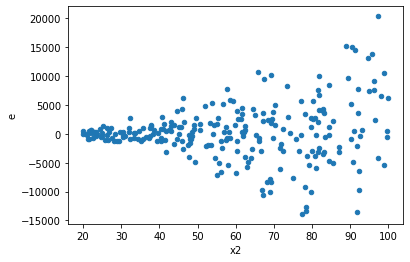

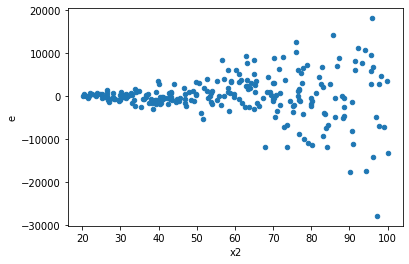

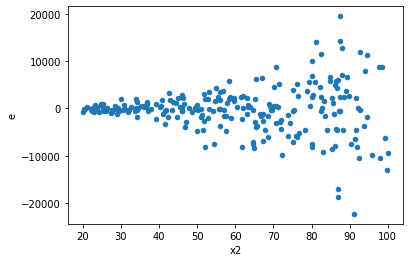

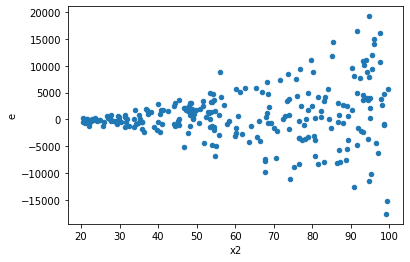

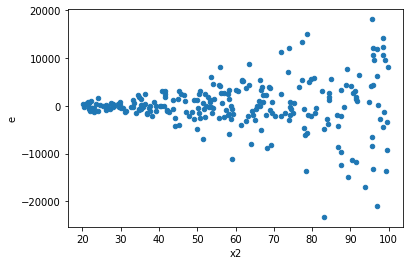

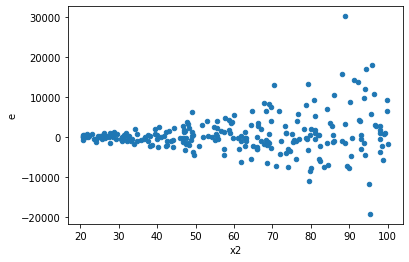

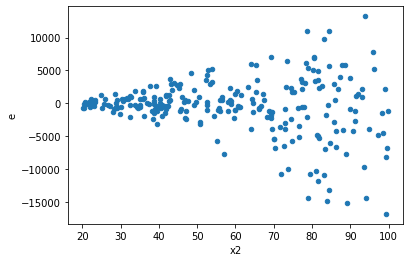

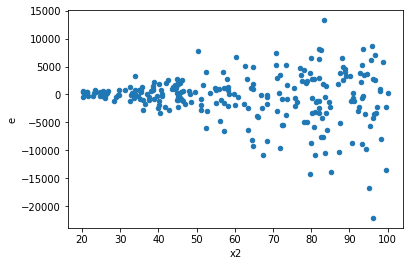

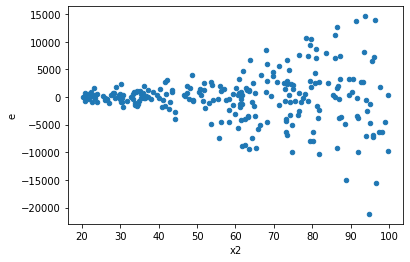

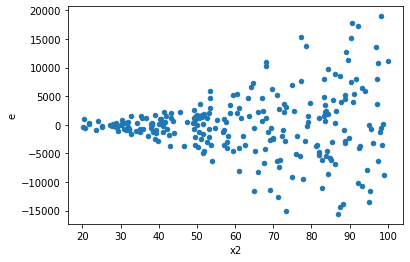

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,553371407.1645441,4197719941.738597,5646647.011883103,42833876.956516296,7.585718899441459,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,266001062.2675955,4998888691.325513,2714296.5537509746,51009068.278831765,18.792739580478294,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,224196685.02131298,4765791420.358027,2287721.2757276837,48630524.697530895,21.257189507083805,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
9.0,98.0,98.0,341362825.31183445,5484144213.452753,3483294.1358350455,55960655.2393138,16.065440659635374,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
10.0,98.0,98.0,246481492.9271957,4483222459.464173,2515117.274767303,45747167.953716055,18.18888065883471,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
12.0,98.0,98.0,1510651608.927142,3938033794.2388325,15414812.335991245,40184018.308559515,2.6068444709337095,3.4071712595729053e-06,0.9999982964143702,1.7035856297864527e-06,Reject001=0 : Heteroscedasticity
17.0,98.0,98.0,214032320.81212205,4949073875.699111,2184003.273593082,50500753.833664395,23.12302112559634,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
18.0,98.0,98.0,435675973.5263373,4599615625.105534,4445673.19924834,46934853.317403406,10.55742318741265,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
24.0,98.0,98.0,356312829.2615399,6234143473.250634,3635845.1965463255,63613708.91072076,17.49626440948233,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,553371407.1645441,4197719941.738597,5646647.011883103,42833876.956516296,7.585718899441459,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,3286987292.2860103,1205304678.7238412,33540686.655979697,12299027.333916746,0.366689789629696,1.2037499894962095e-06,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,3492367480.720894,1249619155.6474764,35636402.86449891,12751215.873953842,0.3578143372785989,6.733529873722838e-07,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,266001062.2675955,4998888691.325513,2714296.5537509746,51009068.278831765,18.792739580478294,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,3151408441.6042185,2542403726.488666,32157228.995961413,25942895.168251693,0.8067515758745827,0.2895155376301336,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,224196685.02131298,4765791420.358027,2287721.2757276837,48630524.697530895,21.257189507083805,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,3853698069.724898,176230549.78650457,39323449.691070385,1798270.9161888221,0.045730243158121894,7.796211659251036e-40,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,3590327761.922524,295506115.09054446,36635997.570638,3015368.5213320865,0.08230616664711105,9.247035669394833e-29,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,4098257070.650706,237924047.75732744,41818949.70051741,2427796.4056870146,0.05805493497740754,3.032666116457937e-35,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    846
Reject001=1 : Homoscedasticity      154
Name: Result_test, dtype: int64